<a href="https://colab.research.google.com/github/hwanython/kaggle-chestXray-penumonia/blob/main/03_data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터를 나누어 주어야하는데, val 폴더가 있지만, NORMAL과 PNEUMONIA에 8장씩 밖에 없다. 그래서 데이터를 좀 나눠서 옴길예정

#TRAIN:VAL = 7:3

In [ ]:
from glob import glob
import os
import numpy as np
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/AI/01.Kaggle/Chest_X_ray_image/data/chest_xray'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

In [ ]:
train_classes = glob(os.path.join(data_dir, "train","*"))
train_classes

['/content/drive/MyDrive/AI/01.Kaggle/Chest_X_ray_image/data/chest_xray/train/PNEUMONIA',
 '/content/drive/MyDrive/AI/01.Kaggle/Chest_X_ray_image/data/chest_xray/train/NORMAL']


아래코드는 따로 폴더를 복사한게 아니라 원래 데이터들 옴긴거라 또 실행하면,,계속 옴겨짐.. 

In [ ]:
np.random.seed(23424)
for train_data_dir in train_classes:
  datas = glob(os.path.join(train_data_dir, "*"))
  val_datas = np.random.choice(datas, size=round(len(datas)*0.3), replace=False)
  for val_data in val_datas:
    shutil.move(val_data, val_data.replace('train', 'val'))

# 데이터 확인

In [ ]:
val_normal_dir = os.path.join(train_dir.replace("train", "val"), "NORMAL")
val_pneumonia_dir = os.path.join(train_dir.replace("train", "val"), "PNEUMONIA")

train_data = len(os.listdir(train_normal_dir) + os.listdir(train_pneumonia_dir))
val_data = len(os.listdir(val_normal_dir) + os.listdir(val_pneumonia_dir))

print("Train data sample:", train_data)
print("Val data sample:", val_data)


Train data sample: 3652
Val data sample: 1580


In [ ]:
import matplotlib.pyplot as plt

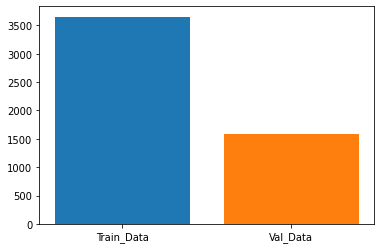

In [ ]:
plt.bar('Train_Data', train_data)
plt.bar('Val_Data', val_data); plt.show()

#원핫인코딩

#NORMAL : 1
#PNEUMONIA: 0

In [ ]:
train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

os.rename(train_normal_dir, train_normal_dir.replace("NORMAL","1"))
os.rename(train_pneumonia_dir, train_pneumonia_dir.replace("PNEUMONIA","0"))

In [ ]:
os.rename(val_normal_dir, val_normal_dir.replace("NORMAL","1"))
os.rename(val_pneumonia_dir, val_pneumonia_dir.replace("PNEUMONIA","0"))